# 神经元信号数据探索与分析

本笔记本用于探索和分析神经元信号数据，包括：
- 数据加载与基本信息检查
- 信号特征分析
- 目标变量分布分析
- 数据质量检查
- 相关性分析

## 任务概述
- **分类任务**：根据神经元信号预测小鼠所在的网格ID（25个类别）
- **回归任务**：根据神经元信号预测小鼠的二维位置坐标
- **数据特征**：147个神经元，序列长度26986

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utils import (
    load_data, print_data_info, analyze_signal_statistics,
    plot_signal_overview, analyze_correlation_matrix, 
    plot_target_distribution, check_data_quality
)

# 设置绘图样式
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

np.random.seed(42)

print("✅ 库导入完成!")

✅ 库导入完成!


## 1. 数据加载与基本信息

首先加载所有数据文件并检查基本信息。

In [2]:
# 加载所有数据
data_dict = load_data()

# 显示基本信息
print_data_info(data_dict)

Loading classification data...
Loading regression data...
DATA INFORMATION SUMMARY

CLASSIFICATION_SIGNALS:
  Shape: (147, 26986)
  Data type: float64
  Min value: 0.0000
  Max value: 26.8229
  Mean: 0.4261
  Std: 1.3285
  NaN values: 0
  Memory usage: 30.27 MB

CLASSIFICATION_LABELS:
  Shape: (26986,)
  Data type: int64
  Min value: 1.0000
  Max value: 25.0000
  Mean: 11.3607
  Std: 7.8859
  NaN values: 0
  Memory usage: 0.21 MB

REGRESSION_SIGNALS:
  Shape: (147, 27011)
  Data type: float64
  Min value: 0.0000
  Max value: 26.8229
  Mean: 0.4261
  Std: 1.3285
  NaN values: 0
  Memory usage: 30.29 MB

REGRESSION_POSITIONS:
  Shape: (27011, 2)
  Data type: float64
  Min value: 0.0010
  Max value: 29.8047
  Mean: 13.4549
  Std: 9.5545
  NaN values: 0
  Memory usage: 0.41 MB


In [3]:
print("数据情况总结:")
print("-" * 40)

class_signals = data_dict['classification_signals']
reg_signals = data_dict['regression_signals']
class_labels = data_dict['classification_labels']
reg_positions = data_dict['regression_positions']

print(f"Classification Task 神经元信号形状: {class_signals.shape}")
print(f"Regression Task 神经元信号形状: {reg_signals.shape}")
print(f"Classification Task 目标标签形状: {class_labels.shape}")
print(f"Regression Task 目标位置形状: {reg_positions.shape}")

print(f"\nClassification Task - 信号时间步数: {class_signals.shape[1]}, 标签数量: {len(class_labels)}")
print(f"Regression Task - 信号时间步数: {reg_signals.shape[1]}, 位置数量: {len(reg_positions)}")



数据情况总结:
----------------------------------------
Classification Task 神经元信号形状: (147, 26986)
Regression Task 神经元信号形状: (147, 27011)
Classification Task 目标标签形状: (26986,)
Regression Task 目标位置形状: (27011, 2)

Classification Task - 信号时间步数: 26986, 标签数量: 26986
Regression Task - 信号时间步数: 27011, 位置数量: 27011


## 2. 数据质量检查

检查数据中是否存在缺失值、异常值等质量问题。

In [4]:
# 执行综合数据质量检查
quality_report = check_data_quality(data_dict)

DATA QUALITY ANALYSIS

Analyzing classification_signals...
  ✅ Data quality looks good

Analyzing classification_labels...
  ✅ Data quality looks good

Analyzing regression_signals...
  ✅ Data quality looks good

Analyzing regression_positions...
  ✅ Data quality looks good


## 3. 神经元信号分析

分析神经元信号的统计特性、分布和时序特征。

Classification Task 神经元信号分析

Classification Signals Statistical Analysis:
----------------------------------------
Number of neurons: 147
Number of time steps: 26986
Overall signal range: [0.0000, 26.8229]
Overall mean: 0.4261
Overall std: 1.3285


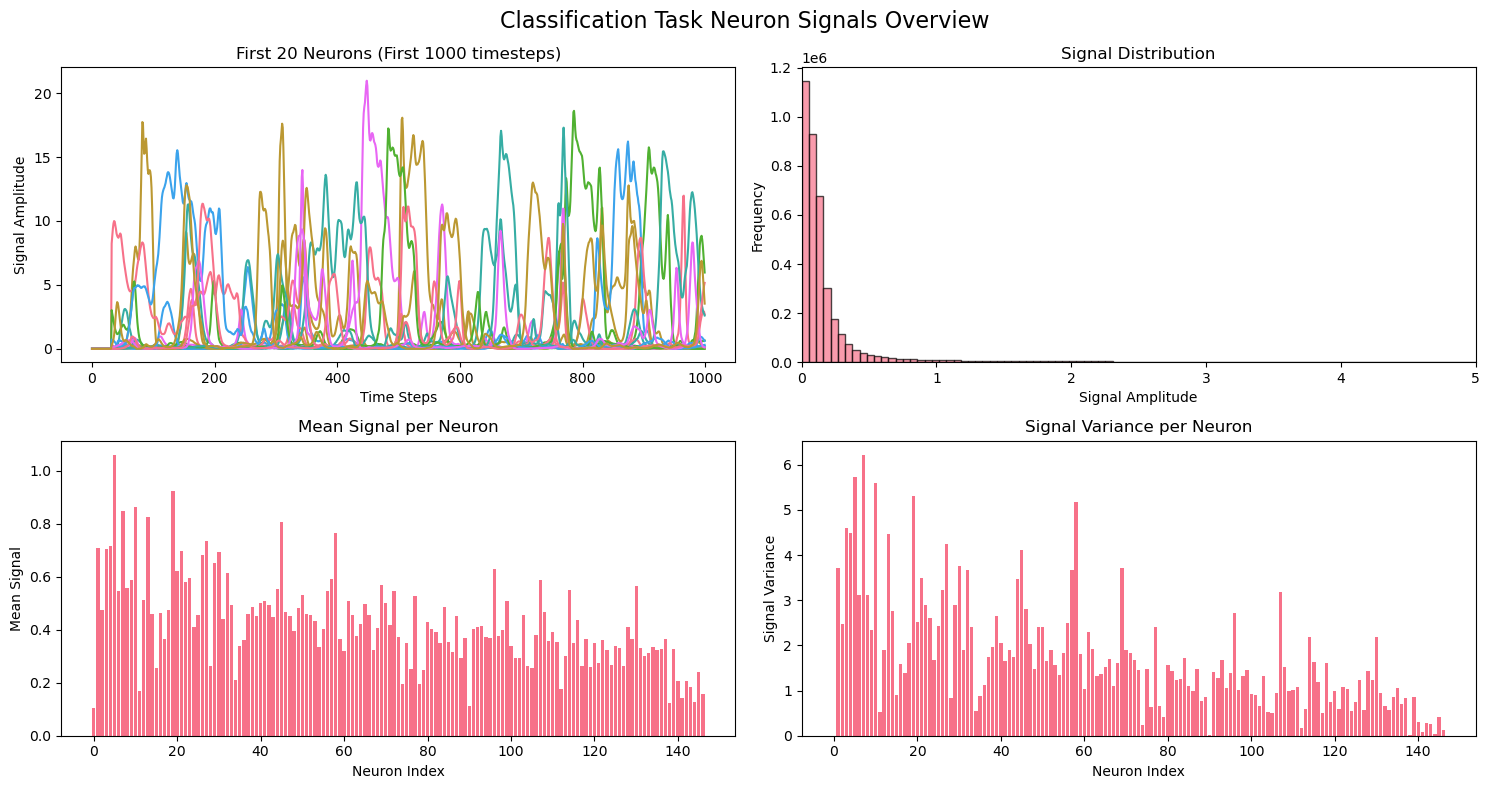

In [5]:
# 分析分类任务的神经元信号
print("=" * 60)
print("Classification Task 神经元信号分析")
print("=" * 60)

# 统计分析
# 将信号数据的形状转换为 (时间步, 神经元数)
signals_for_analysis = class_signals.T if class_signals.shape[0] < class_signals.shape[1] else class_signals
class_stats = analyze_signal_statistics(signals_for_analysis, "Classification Signals")

# 可视化概览
# Plot 1: First few neurons over time
# Plot 2: Signal distribution histogram
# Plot 3: Mean signal per neuron
# Plot 4: Signal variance per neuron
plot_signal_overview(class_signals.T, "Classification Task Neuron Signals")

回归任务神经元信号分析

Regression Signals Statistical Analysis:
----------------------------------------
Number of neurons: 147
Number of time steps: 27011
Overall signal range: [0.0000, 26.8229]
Overall mean: 0.4261
Overall std: 1.3285


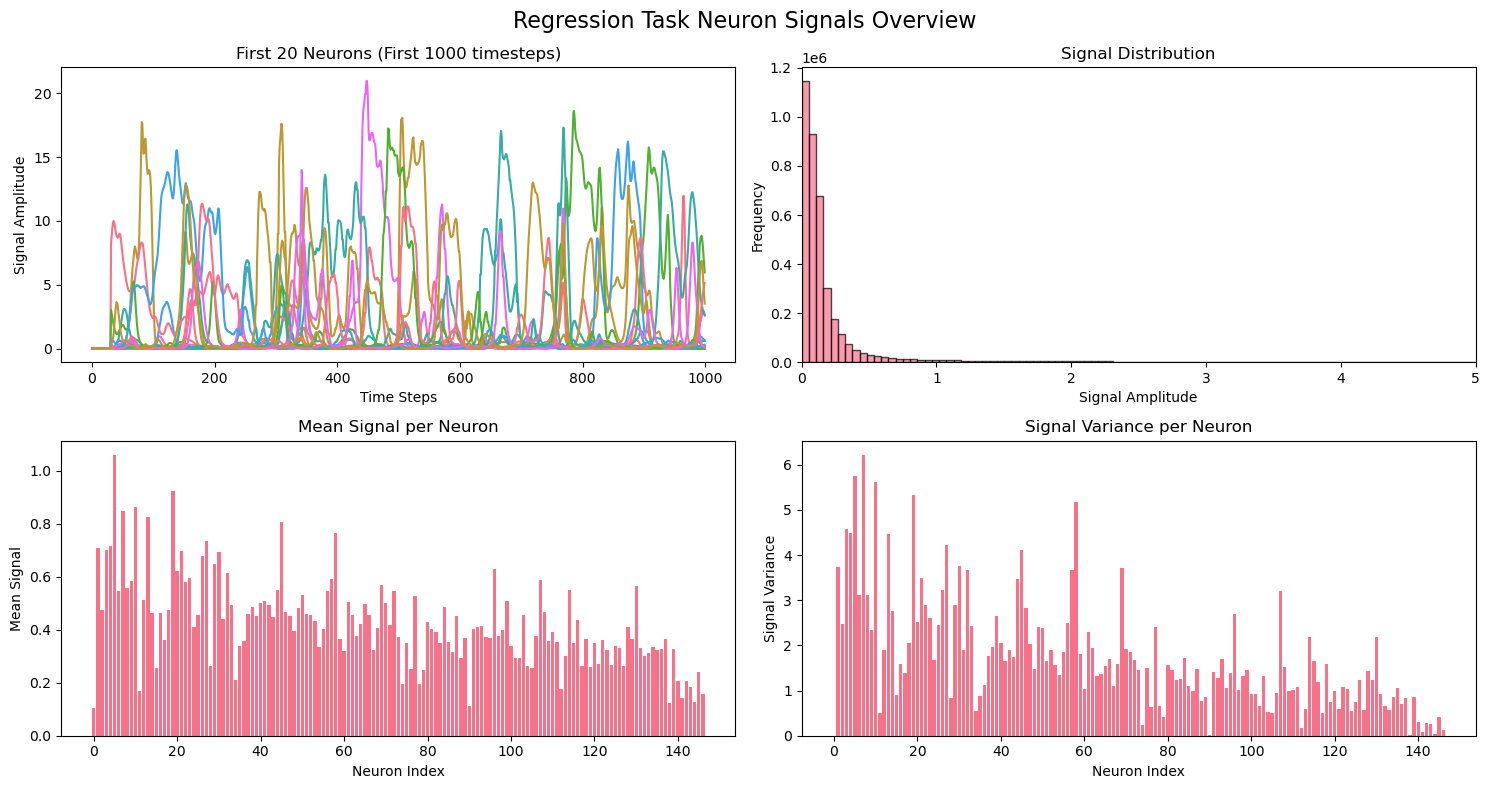

In [6]:
# 分析回归任务的神经元信号
print("=" * 60)
print("回归任务神经元信号分析")
print("=" * 60)

# 统计分析
# 将信号数据的形状转换为 (时间步, 神经元数)
signals_for_analysis_02 = reg_signals.T if reg_signals.shape[0] < reg_signals.shape[1] else reg_signals
reg_stats = analyze_signal_statistics(signals_for_analysis_02, "Regression Signals")

# 可视化概览
# Plot 1: First few neurons over time
# Plot 2: Signal distribution histogram
# Plot 3: Mean signal per neuron
# Plot 4: Signal variance per neuron
plot_signal_overview(reg_signals.T, "Regression Task Neuron Signals")

## 147个神经元的独立分析
1. 信号的稀疏性和爆发性
+ 【观察】 (左上和右上图)
    + 时间序列图 (左上): 任意一个神经元的信号都不是平滑连续的。它们在大部分时间里都处于一个非常低的 baseline 水平 (接近0)，然后突然出现短暂而剧烈的活动峰值 (“爆发”)，随后又迅速回落。
    + 信号分布直方图 (右上): 上述局部抽样观察在全局数据上得到了验证。可以看到信号幅度的分布是高度右偏 (heavily right-skewed) 的。绝大多数 (100万次+) 的信号值都挤在0附近，而高幅度的信号 (例如 > 1.0) 虽然存在，但非常罕见。
+ 【建模启示】
    + 这种“静默-爆发”模式要求模型有能力忽略长段的无信息时段，并捕捉到关键的爆发时刻。
    + 因此，我猜想带有遗忘门结构的RNN模型 (如LSTM和GRU) 会更加适合这种数据。它们的门控机制可以学会“忘记”不重要的 baseline 信号，并“记住”和传递有意义的爆发信号。
2. 神经元间的 Heterogeneity
+ 【观察】 (左下和右下图)
    + 各神经元平均信号图 (左下): 147个神经元的平均活动水平 (Mean Signal) 差异巨大。
    + 各神经元信号方差图 (右下): 147个神经元的信号方差 (Signal Variance) 也差异巨大。
+ 【建模启示】
    + 这种异质性意味着每个神经元都是一个独特的特征源，它们可能编码了关于老鼠位置的不同方面的信息。
    + 也佐证了 normalization 的重要性。通过 (X - mean) / std 将所有神经元的信号拉到相似的尺度上，防止模型仅仅因为某些神经元的天然音量大而给予它们过高的权重。模型应该基于信号的模式而非绝对值来学习。

---

神经元相关性分析
分析分类任务神经元相关性...


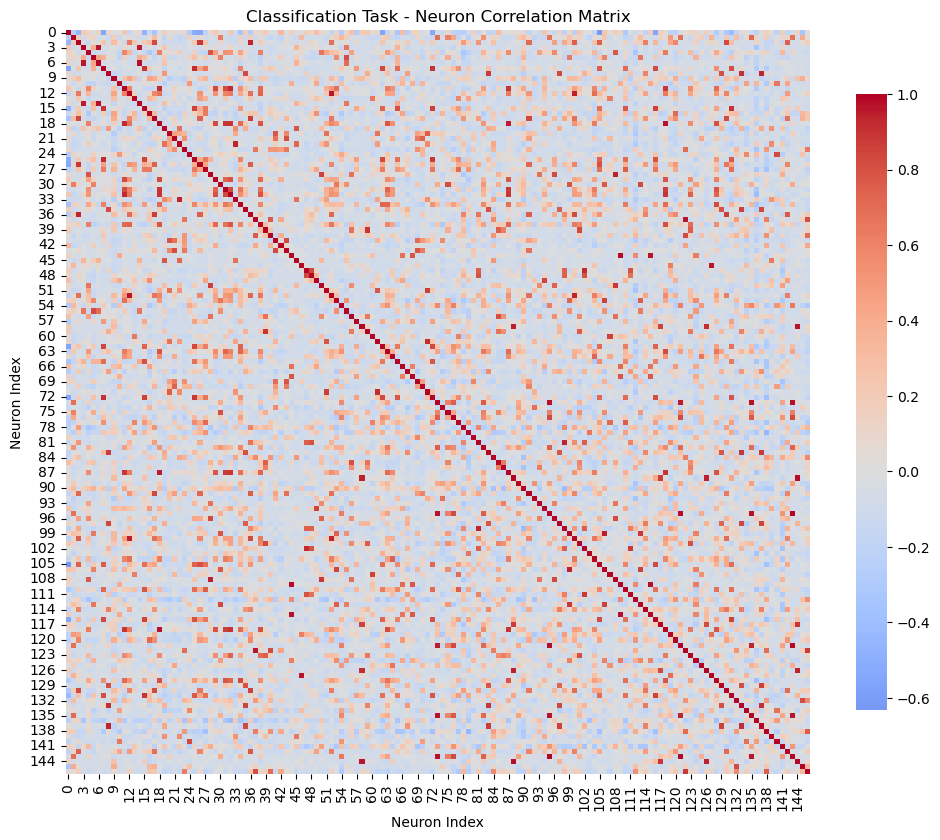


Correlation Statistics for Classification Task:
Mean correlation: 0.0204
Std correlation: 0.2095
Max correlation: 0.9983
Min correlation: -0.6324


In [7]:
# 分析神经元间的相关性
print("=" * 60)
print("神经元相关性分析")
print("=" * 60)

# 分析分类任务的神经元相关性
print("分析分类任务神经元相关性...")
class_signals_transposed = class_signals.T  # 转换为 (26986, 147) 形状
class_corr_matrix = analyze_correlation_matrix(class_signals_transposed, "Classification Task", sample_size=30)

## 147个神经元的联合分析
1. 【观察】除了对角线以外，深色不多：
    + 表明这147个神经元提供了独立性较高、冗余度较低的信息。
    + 意味着应该将所有147个神经元都作为模型的输入特征。进行PCA等降维操作可能会丢失信息，因为大部分方差已经分布在各个独立的维度 (神经元) 上了。
2. 【观察】仍然存在少量深色：
    + 表明存在一些小的神经元集群会协同活动或相互抑制。
    + 意味着可能需要较深层的网络或更多的参数来学习数据间的协同作用。

---

## 4. 目标变量分析

分析分类任务的网格ID分布和回归任务的位置分布。

分类任务目标变量分析:
----------------------------------------
网格ID范围: 1 到 25
唯一网格ID数量: 25
期望类别数: 25

类别分布统计:
  网格ID 1: 3116 个样本 (11.5%)
  网格ID 2: 1661 个样本 (6.2%)
  网格ID 3: 1166 个样本 (4.3%)
  网格ID 4: 1317 个样本 (4.9%)
  网格ID 5: 1646 个样本 (6.1%)
  网格ID 6: 1306 个样本 (4.8%)
  网格ID 7: 714 个样本 (2.6%)
  网格ID 8: 739 个样本 (2.7%)
  网格ID 9: 698 个样本 (2.6%)
  网格ID 10: 1161 个样本 (4.3%)
  网格ID 11: 1070 个样本 (4.0%)
  网格ID 12: 635 个样本 (2.4%)
  网格ID 13: 744 个样本 (2.8%)
  网格ID 14: 703 个样本 (2.6%)
  网格ID 15: 996 个样本 (3.7%)
  网格ID 16: 1268 个样本 (4.7%)
  网格ID 17: 646 个样本 (2.4%)
  网格ID 18: 547 个样本 (2.0%)
  网格ID 19: 795 个样本 (2.9%)
  网格ID 20: 945 个样本 (3.5%)
  网格ID 21: 1442 个样本 (5.3%)
  网格ID 22: 696 个样本 (2.6%)
  网格ID 23: 705 个样本 (2.6%)
  网格ID 24: 1016 个样本 (3.8%)
  网格ID 25: 1254 个样本 (4.6%)


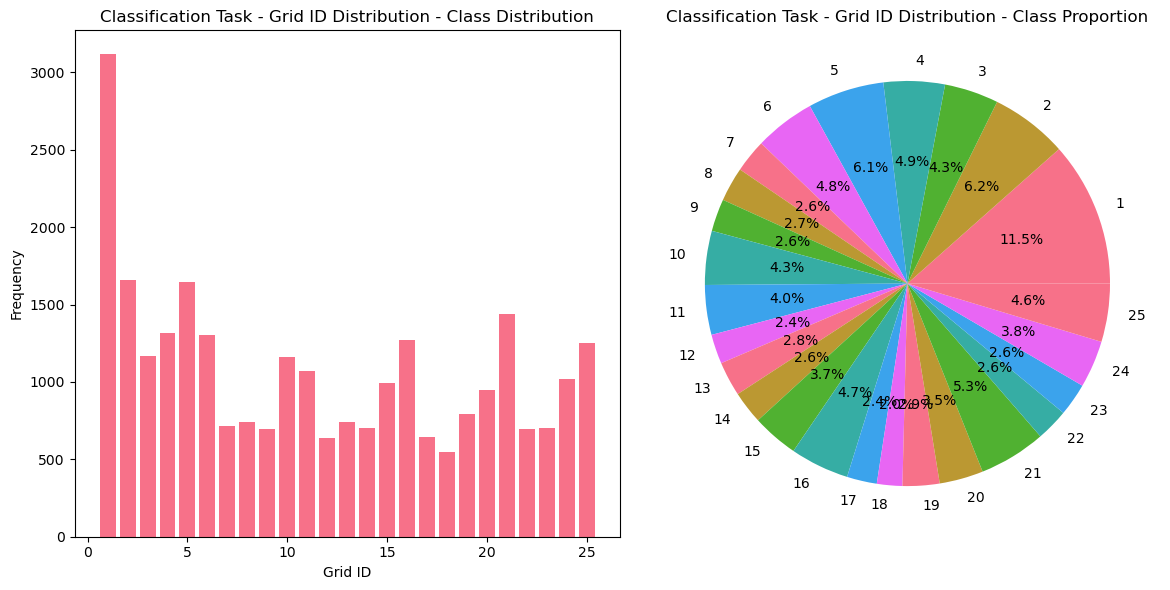

In [8]:
# 分析分类任务的目标分布
print("分类任务目标变量分析:")
print("-" * 40)
print(f"网格ID范围: {class_labels.min()} 到 {class_labels.max()}")
print(f"唯一网格ID数量: {len(np.unique(class_labels))}")
print(f"期望类别数: 25")

# 检查类别分布
unique_labels, label_counts = np.unique(class_labels, return_counts=True)
print(f"\n类别分布统计:")
for label, count in zip(unique_labels, label_counts):
    print(f"  网格ID {label}: {count} 个样本 ({100*count/len(class_labels):.1f}%)")

# 可视化分类目标分布
plot_target_distribution(class_labels, "Classification Task - Grid ID Distribution", is_categorical=True)

## 分类任务目标变量 (Grid ID) 分析
+ 【观察】类别不平衡 (Class Imbalance) 非常显著: 从条形图和饼图都可以清楚地看到，各个Grid ID的样本数量差异很大。
+ 【建模启示】
    1. 评估指标的选择:
        + 不能使用准确率 (Accuracy) 作为唯一的评估指标。e.g., 一个偷懒的模型如果总是预测占比最高的类别 1，也能获得11.5%的准确率。
        + 应采用更鲁棒的指标，如 F1-Score (尤其是 Macro-F1 或 Weighted-F1)、精确率 (Precision)、召回率 (Recall) 以及 混淆矩阵 (Confusion Matrix) 来全面评估模型性能。
    2. 模型训练策略需要调整:
        + 损失函数: 标准的交叉熵损失函数可能会让模型过度关注多数类，而忽略少数类。最好采用加权交叉熵损失 (Weighted Cross-Entropy Loss)。为少数类分配更高的权重，为多数类分配较低的权重，可以“强制”模型更加关注那些难以学习的少数类样本。

---

回归任务目标变量分析:
----------------------------------------
位置数据形状: (27011, 2)
X坐标范围: 0.00 到 29.49 m
Y坐标范围: 0.03 到 29.80 m
X坐标均值: 12.97 ± 9.42 m
Y坐标均值: 13.93 ± 9.66 m


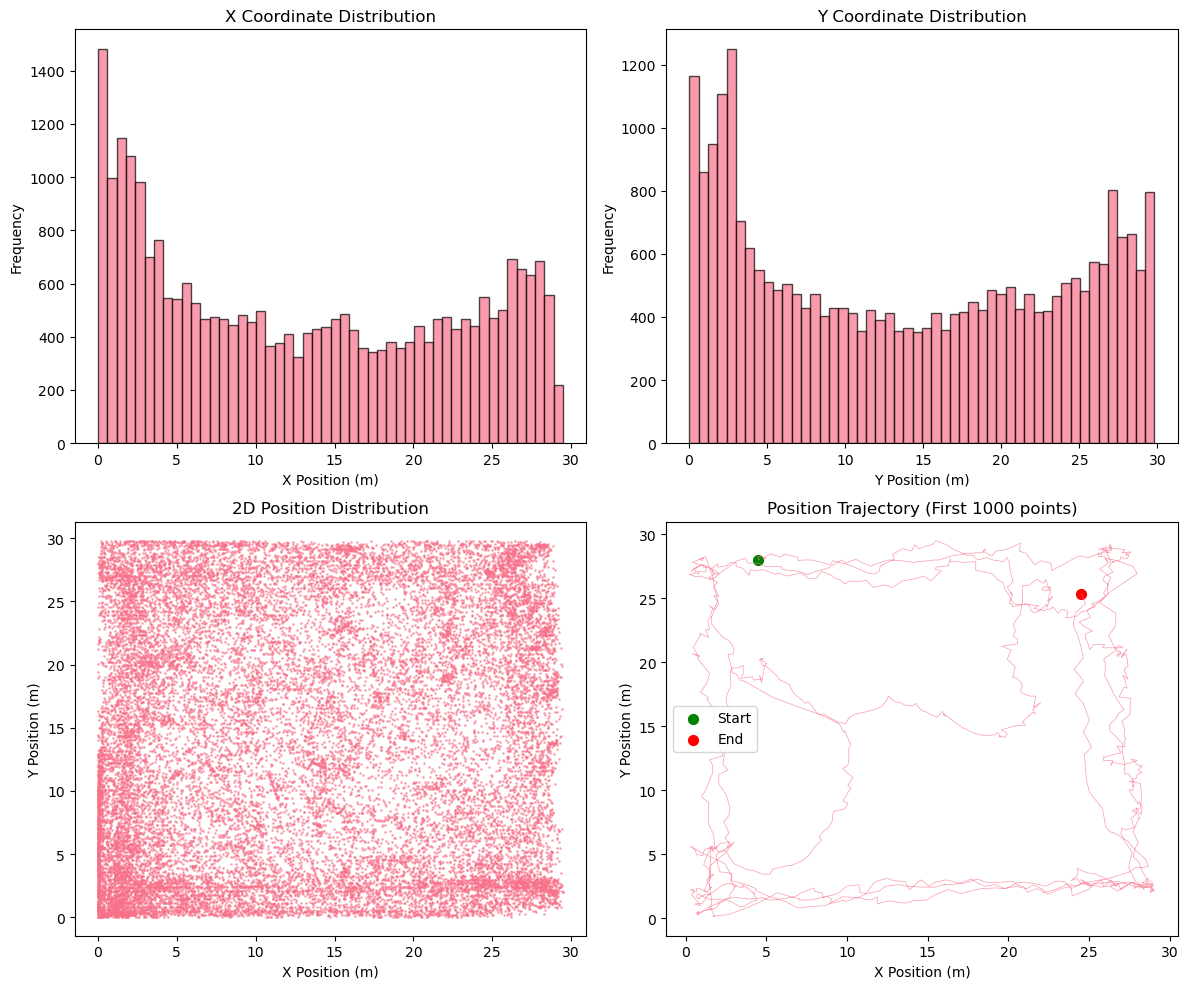

In [9]:
# 分析回归任务的目标分布
print("回归任务目标变量分析:")
print("-" * 40)
print(f"位置数据形状: {reg_positions.shape}")
print(f"X坐标范围: {reg_positions[:, 0].min():.2f} 到 {reg_positions[:, 0].max():.2f} m")
print(f"Y坐标范围: {reg_positions[:, 1].min():.2f} 到 {reg_positions[:, 1].max():.2f} m")
print(f"X坐标均值: {reg_positions[:, 0].mean():.2f} ± {reg_positions[:, 0].std():.2f} m")
print(f"Y坐标均值: {reg_positions[:, 1].mean():.2f} ± {reg_positions[:, 1].std():.2f} m")

# 可视化回归目标分布
plot_target_distribution(reg_positions, "Regression Task - Position Distribution", is_categorical=False)

## 回归任务目标变量 (2D Position) 分析
+ 【观察】
    + (上排、左下) 空间分布不均匀：老鼠的活动轨迹绝大多数都集中在方形空间的四条边界上，而中心区域非常稀疏。这是啮齿类动物在开放空间中典型的“趋壁性”或“沿墙”行为。
    + (右下) 运动轨迹具有时间连续性。

+ 【建模启示】
    1. 模型选择的合理性: 时间连续性，这个特性支持了使用时序模型的决定。
    2. 模型可能存在的偏见: 由于训练数据主要集中在边界区域，模型在预测边界位置时可能会表现得比预测中心区域位置更好。在评估时，除了计算整体的MSE/MAE，也可以选择性分析模型在不同区域（边界 vs. 中心）的预测误差，来了解模型的行为。

---

## 5. 时序特征分析

分析神经元信号的时序特征，包括自相关性、趋势等。

基于神经元激活持续时间对 rolling window 大小的分析
神经元 0: 124 个激活期, 平均持续 21.2 步
  - 长激活期 (≥60步): 1 个, 占比: 0.8%
  - 持续时间范围: 5-100 步
神经元 1: 76 个激活期, 平均持续 35.6 步
  - 长激活期 (≥60步): 8 个, 占比: 10.5%
  - 持续时间范围: 5-148 步
神经元 14: 79 个激活期, 平均持续 35.0 步
  - 长激活期 (≥60步): 5 个, 占比: 6.3%
  - 持续时间范围: 5-275 步
神经元 50: 76 个激活期, 平均持续 35.1 步
  - 长激活期 (≥60步): 5 个, 占比: 6.6%
  - 持续时间范围: 6-151 步
神经元 100: 74 个激活期, 平均持续 37.1 步
  - 长激活期 (≥60步): 4 个, 占比: 5.4%
  - 持续时间范围: 5-214 步
神经元 146: 88 个激活期, 平均持续 31.4 步
  - 长激活期 (≥60步): 3 个, 占比: 3.4%
  - 持续时间范围: 5-135 步


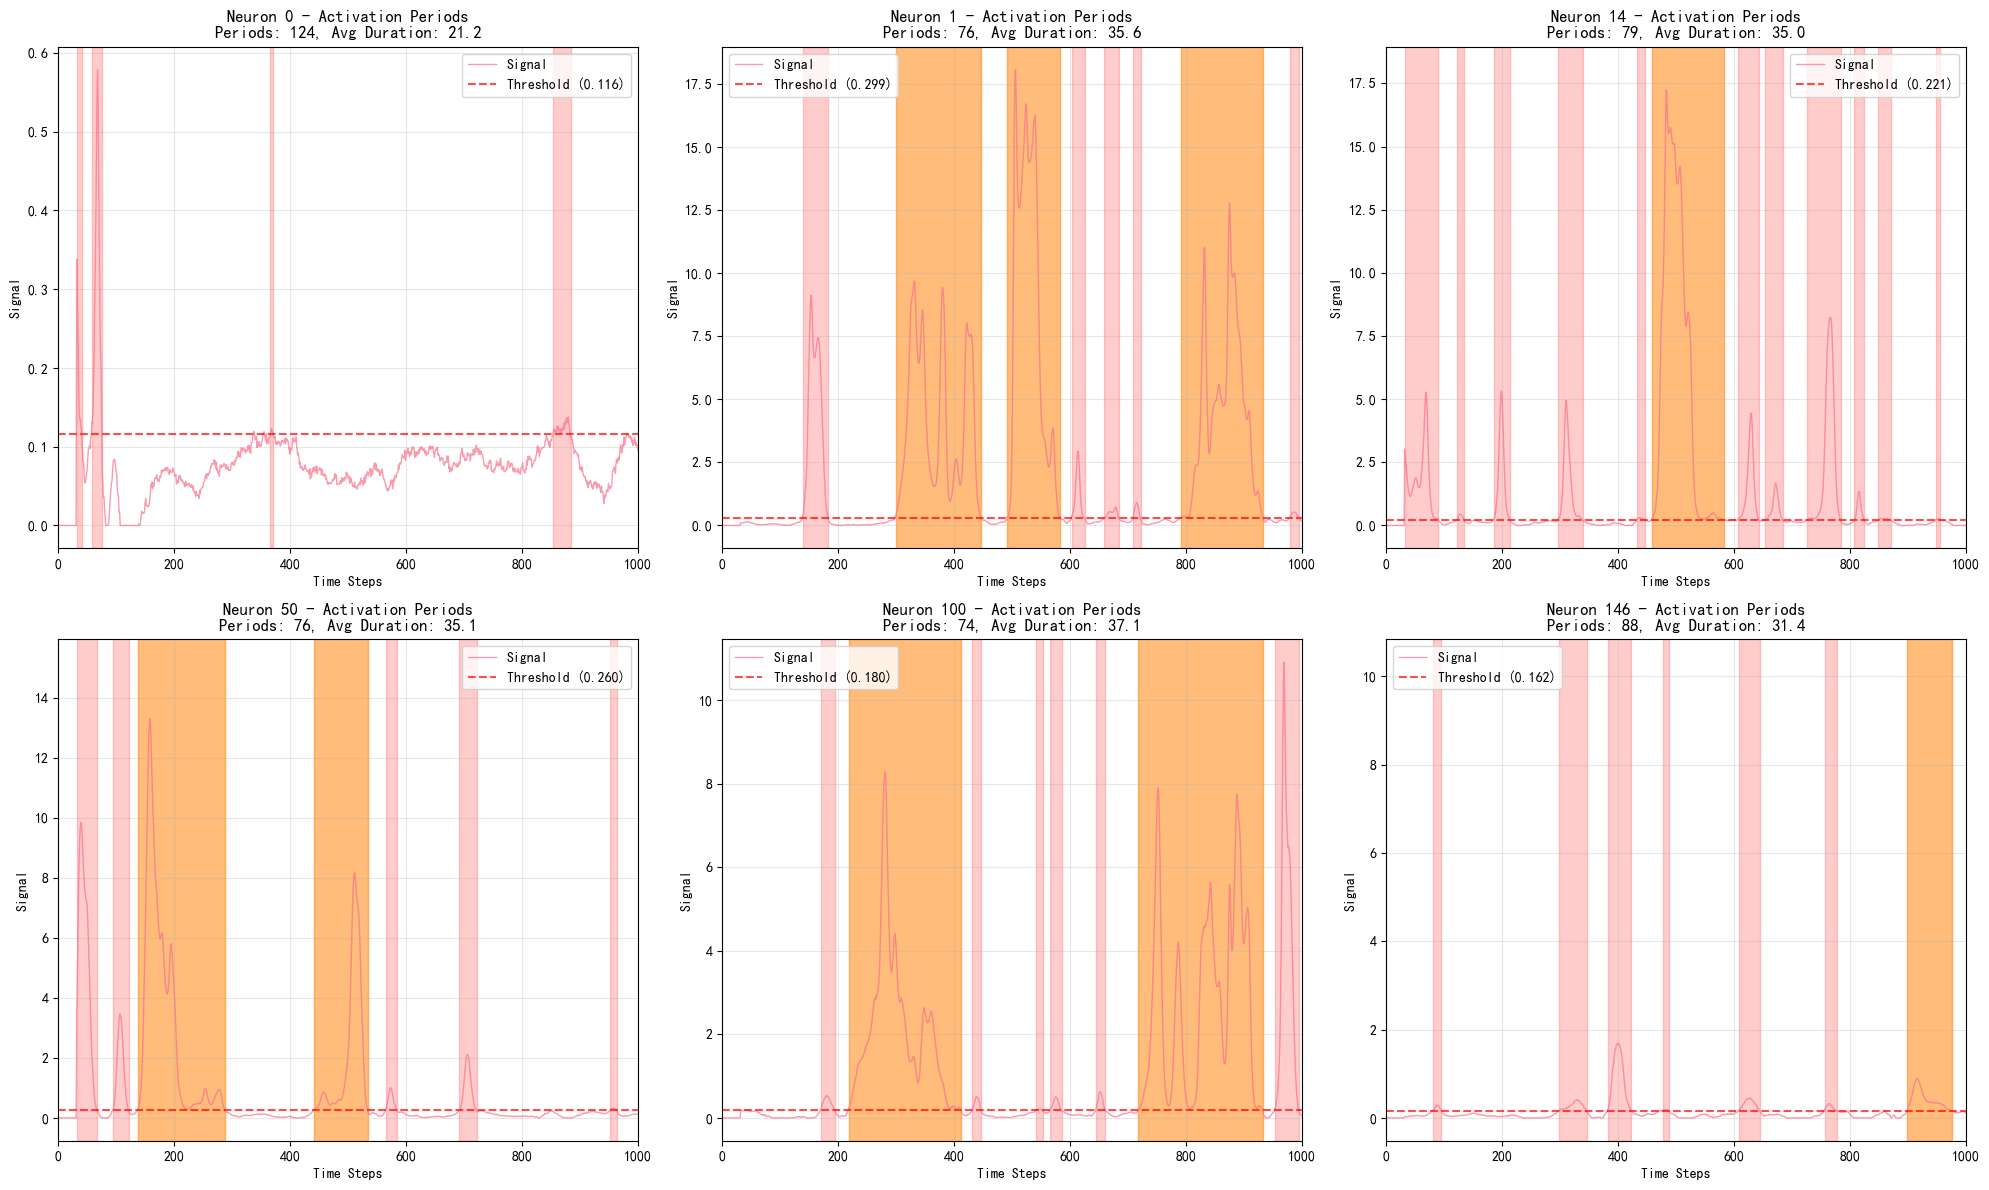


所有神经元激活持续时间统计:
总激活期数量: 517
平均持续时间: 31.47 ± 28.40 步
中位数持续时间: 24.00 步
持续时间范围: 5-275 步


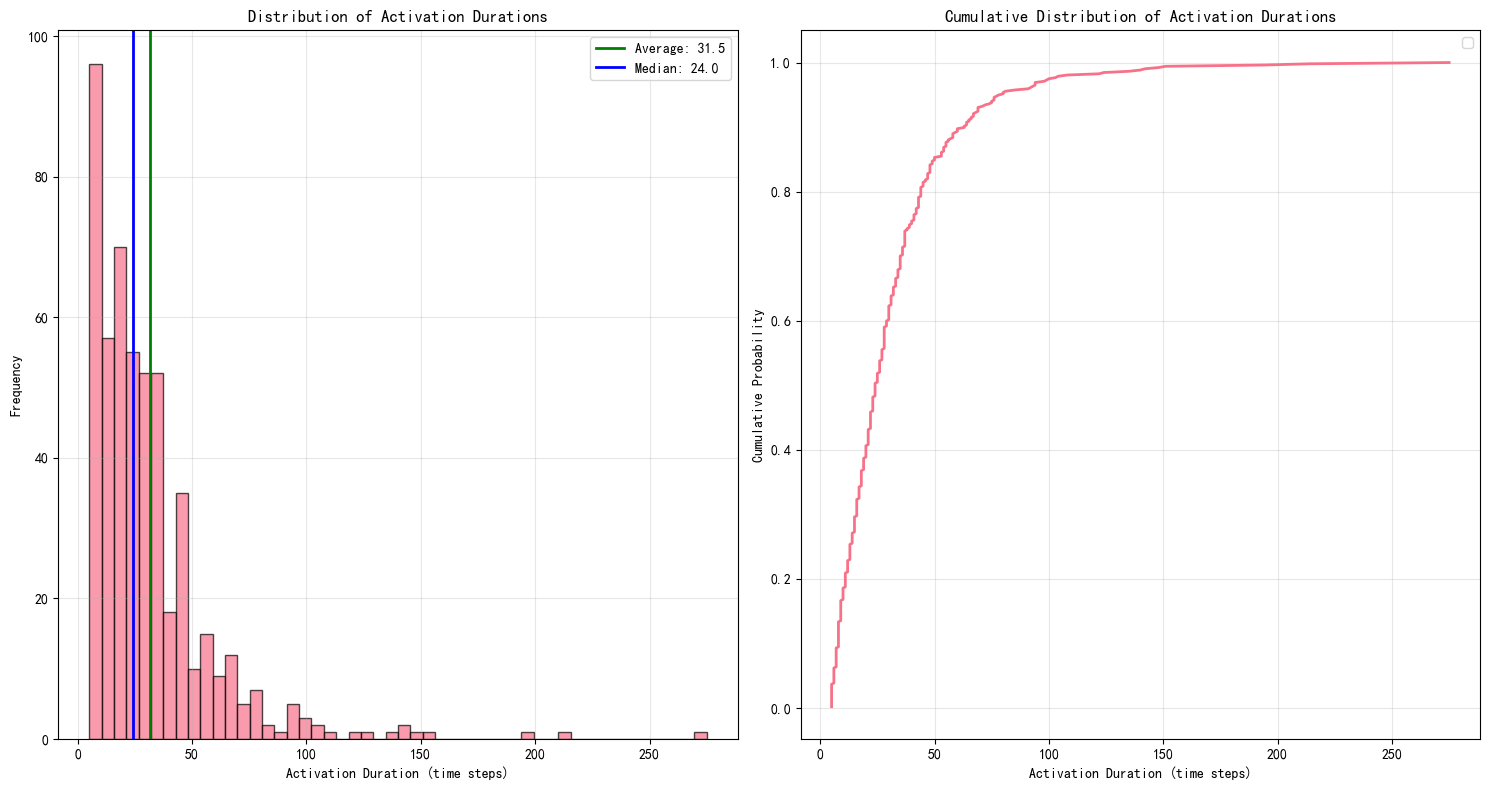


基于激活持续时间的窗口大小设想
激活持续时间百分位数:
  25%: 13.0 步
  50%: 24.0 步
  75%: 40.0 步
  90%: 63.0 步
  95%: 78.4 步

基于激活持续时间的 rolling window 大小:
  短期特征捕捉: 13-24 步 (覆盖25%-50%的激活期)
  中期特征捕捉: 24-40 步 (覆盖50%-75%的激活期)
  长期特征捕捉: 40-63 步 (覆盖75%-90%的激活期)
  完整激活周期: 63+ 步 (覆盖90%+的激活期)

最终 rolling window 大小组合:
   主要 rolling window 大小: [24, 40, 63]
   多尺度组合: [24, 40] (用于特征提取)
   完整周期窗口: 63 (用于长期依赖建模)


In [45]:
# 基于神经元激活持续时间的深度分析
print("=" * 60)
print("基于神经元激活持续时间对 rolling window 大小的分析")
print("=" * 60)

# 1. 分析神经元激活持续时间分布
def find_activation_periods(signal, threshold_percentile=75, min_duration=5):
    """
    识别神经元的激活期间
    threshold_percentile: 激活阈值百分位数
    min_duration: 最小激活持续时间
    """
    threshold = np.percentile(signal[signal > 0], threshold_percentile) if np.sum(signal > 0) > 0 else 0
    
    # 识别激活状态
    active = signal > threshold
    
    # 找到激活期的开始和结束点
    activation_periods = []
    start = None
    
    for i, is_active in enumerate(active):
        if is_active and start is None:
            start = i
        elif not is_active and start is not None:
            duration = i - start
            if duration >= min_duration:
                activation_periods.append((start, i, duration))
            start = None
    
    # 处理在序列末尾仍然激活的情况
    if start is not None:
        duration = len(active) - start
        if duration >= min_duration:
            activation_periods.append((start, len(active), duration))
    
    return activation_periods, threshold

# 选择几个活跃的神经元进行分析
active_neurons = [0, 1, 14, 50, 100, 146]
all_durations = []

plt.rcParams['font.family'] = 'SimHei'
plt.figure(figsize=(20, 12))

for idx, neuron_id in enumerate(active_neurons):
    plt.subplot(2, 3, idx+1)
    
    # 获取神经元信号（前10000个时间点）
    signal = class_signals[neuron_id, :10000]
    
    # 找到激活期间
    periods, threshold = find_activation_periods(signal, threshold_percentile=70, min_duration=5)
    
    # 收集持续时间
    durations = [period[2] for period in periods]
    all_durations.extend(durations)
    
    # 绘制信号和激活期间
    plt.plot(signal, alpha=0.7, linewidth=1, label='Signal')
    plt.axhline(y=threshold, color='r', linestyle='--', alpha=0.7, label=f'Threshold ({threshold:.3f})')
    
    # 标记激活期间
    for start, end, duration in periods:
        plt.axvspan(start, end, alpha=0.2, color='red')
        if duration >= 60:  # 标记长激活期
            plt.axvspan(start, end, alpha=0.4, color='orange')
    
    plt.title(f'Neuron {neuron_id} - Activation Periods\n'
             f'Periods: {len(periods)}, Avg Duration: {np.mean(durations):.1f}')
    plt.xlabel('Time Steps')
    plt.ylabel('Signal')
    plt.xlim(0, 1000)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 打印详细信息
    long_periods = [d for d in durations if d >= 80]
    print(f"神经元 {neuron_id}: {len(periods)} 个激活期, 平均持续 {np.mean(durations):.1f} 步")
    print(f"  - 长激活期 (≥60步): {len(long_periods)} 个, 占比: {len(long_periods)/len(periods)*100:.1f}%")
    if len(durations) > 0:
        print(f"  - 持续时间范围: {min(durations)}-{max(durations)} 步")

plt.tight_layout()
plt.show()

# 2. 激活持续时间统计分析
print(f"\n所有神经元激活持续时间统计:")
print(f"总激活期数量: {len(all_durations)}")
print(f"平均持续时间: {np.mean(all_durations):.2f} ± {np.std(all_durations):.2f} 步")
print(f"中位数持续时间: {np.median(all_durations):.2f} 步")
print(f"持续时间范围: {min(all_durations)}-{max(all_durations)} 步")

# 3. 基于激活持续时间的窗口大小分析
plt.figure(figsize=(15, 8))

# 绘制激活持续时间分布
plt.subplot(1, 2, 1)
plt.hist(all_durations, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(x=np.mean(all_durations), color='green', linestyle='-', linewidth=2, label=f'Average: {np.mean(all_durations):.1f}')
plt.axvline(x=np.median(all_durations), color='blue', linestyle='-', linewidth=2, label=f'Median: {np.median(all_durations):.1f}')
plt.xlabel('Activation Duration (time steps)')
plt.ylabel('Frequency')
plt.title('Distribution of Activation Durations')
plt.legend()
plt.grid(True, alpha=0.3)

# 绘制累积分布
plt.subplot(1, 2, 2)
sorted_durations = np.sort(all_durations)
cumulative = np.arange(1, len(sorted_durations) + 1) / len(sorted_durations)
plt.plot(sorted_durations, cumulative, linewidth=2)
plt.xlabel('Activation Duration (time steps)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Activation Durations')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. 基于激活持续时间的新窗口大小设想
print(f"\n" + "=" * 60)
print("基于激活持续时间的窗口大小设想")
print("=" * 60)

# 计算关键百分位数
percentiles = [25, 50, 75, 90, 95]
duration_percentiles = np.percentile(all_durations, percentiles)

print("激活持续时间百分位数:")
for p, val in zip(percentiles, duration_percentiles):
    print(f"  {p}%: {val:.1f} 步")

# 建议的窗口大小
print(f"\n基于激活持续时间的 rolling window 大小:")
print(f"  短期特征捕捉: {int(duration_percentiles[0])}-{int(duration_percentiles[1])} 步 (覆盖25%-50%的激活期)")
print(f"  中期特征捕捉: {int(duration_percentiles[1])}-{int(duration_percentiles[2])} 步 (覆盖50%-75%的激活期)")
print(f"  长期特征捕捉: {int(duration_percentiles[2])}-{int(duration_percentiles[3])} 步 (覆盖75%-90%的激活期)")
print(f"  完整激活周期: {int(duration_percentiles[3])}+ 步 (覆盖90%+的激活期)")

# 5. 最终的窗口大小组合
print(f"\n最终 rolling window 大小组合:")
recommended_windows = [
    int(duration_percentiles[1]),  # 中位数
    int(duration_percentiles[2]),  # 75%分位数
    int(duration_percentiles[3])   # 90%分位数
]

print(f"   主要 rolling window 大小: {recommended_windows}")
print(f"   多尺度组合: {recommended_windows[:2]} (用于特征提取)")
print(f"   完整周期窗口: {recommended_windows[2]} (用于长期依赖建模)")